___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.model_selection import train_test_split
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv",encoding="latin-1")
df_male = pd.read_csv("ANSUR II MALE Public.csv",encoding="latin-1")

In [3]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [4]:
df_female = df_female.rename({"SubjectId":"subjectid"},axis=1)

In [5]:
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [6]:
df_female.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [7]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [8]:
df_male.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [9]:
df_male.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

## Explore Data

In [10]:
df = pd.concat([df_female,df_male],ignore_index=True)

In [11]:
df.shape

(6068, 108)

In [12]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [14]:
df = df.drop(['Date', 'Component', 'Installation', 'Branch', 'PrimaryMOS', 'SubjectNumericRace', 'Weightlbs', "Ethnicity", 'Heightin', 'subjectid'],axis=1)

In [15]:
df.head(5)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,2,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,3,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,1,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,2,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,1,45,Right hand


In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df = df[df.DODRace < 4]

In [19]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [20]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [21]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

show_nans(df,20)

Series([], dtype: float64)

In [22]:
df.isnull().sum()/df.shape[0]*100

abdominalextensiondepthsitting    0.0
acromialheight                    0.0
acromionradialelength             0.0
anklecircumference                0.0
axillaheight                      0.0
balloffootcircumference           0.0
balloffootlength                  0.0
biacromialbreadth                 0.0
bicepscircumferenceflexed         0.0
bicristalbreadth                  0.0
bideltoidbreadth                  0.0
bimalleolarbreadth                0.0
bitragionchinarc                  0.0
bitragionsubmandibulararc         0.0
bizygomaticbreadth                0.0
buttockcircumference              0.0
buttockdepth                      0.0
buttockheight                     0.0
buttockkneelength                 0.0
buttockpopliteallength            0.0
calfcircumference                 0.0
cervicaleheight                   0.0
chestbreadth                      0.0
chestcircumference                0.0
chestdepth                        0.0
chestheight                       0.0
crotchheight

In [23]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [24]:
df["DODRace"].replace({1:"White", 2: "Black", 3: "Hispanic"}, inplace=True)

In [25]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,Black,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,Hispanic,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,White,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,Black,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,White,45,Right hand


In [26]:
df.isnull().sum().sum()

0

In [27]:
df.shape

(5769, 98)

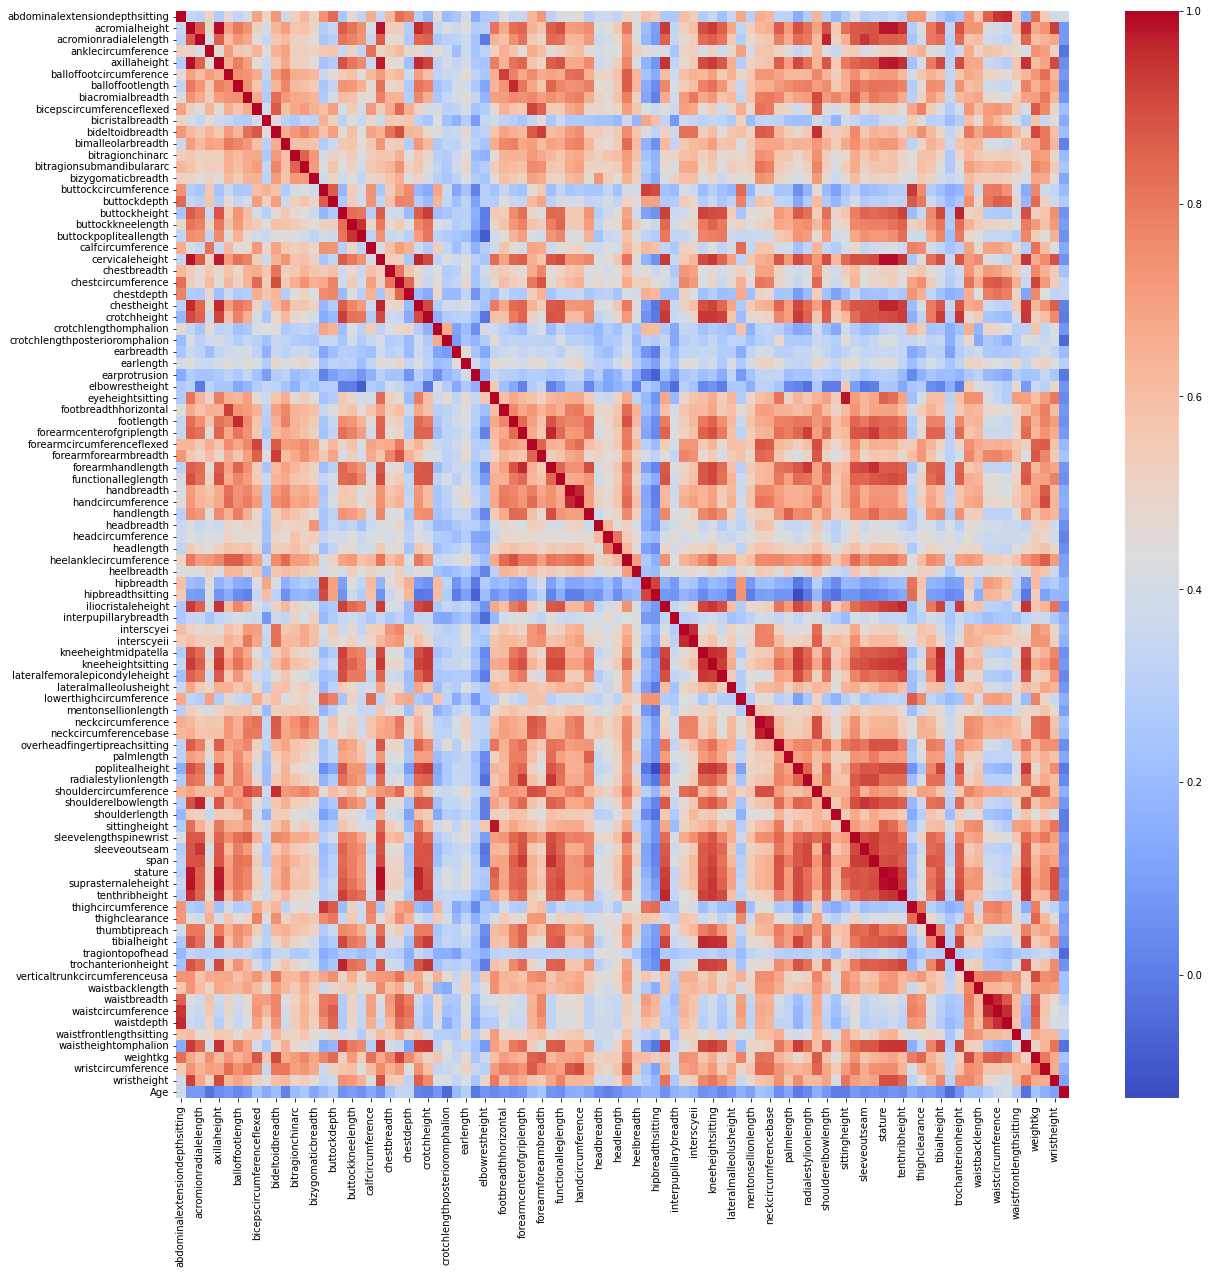

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='coolwarm');

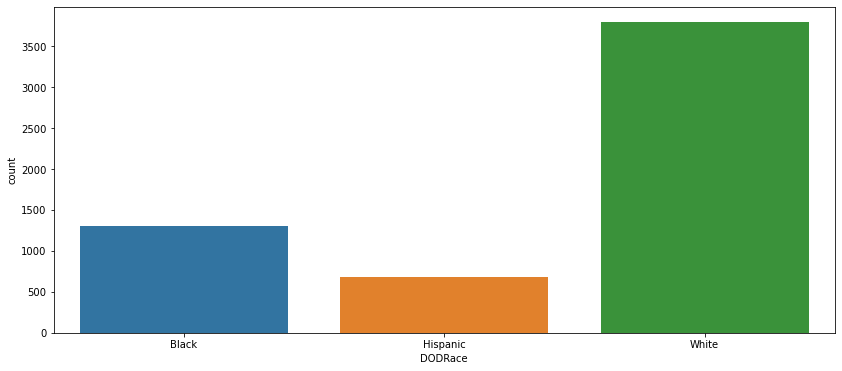

In [29]:
plt.figure(figsize=(14,6))
sns.countplot(df.DODRace);

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [30]:
X = pd.get_dummies(df.drop('DODRace', axis = 1), drop_first = True)
y = df.DODRace

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [34]:
pipe_log_model = Pipeline(steps=operations)

In [35]:
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [36]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [37]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  9 100  27]
 [ 24  99 635]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.90       260
    Hispanic       0.47      0.74      0.58       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 970   36   32]
 [  20  460   63]
 [  64  353 2617]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [38]:
operations = [('scaler', MinMaxScaler()), ('log', LogisticRegression(class_weight='balanced', max_iter=10000, random_state = 101))] 

In [39]:
pipe_model = Pipeline(steps=operations)

In [40]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [41]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.612565
test_precision_Hispanic    0.503333
test_recall_Hispanic       0.786330
dtype: float64

### Logistic Model GridsearchCV

In [42]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=['Hispanic'])

In [43]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [44]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)


In [45]:
log_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [46]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [47]:
log_model_grid.best_score_

0.7900781515460414

In [48]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  9 100  27]
 [ 24  99 635]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.90       260
    Hispanic       0.47      0.74      0.58       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 970   36   32]
 [  20  460   63]
 [  64  353 2617]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



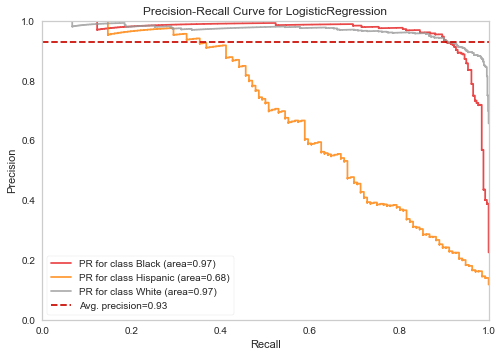

In [49]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## 2. SVC

### Vanilla SVC model 

In [50]:
operations_svc = [('scaler', MinMaxScaler()), ('svc', SVC(class_weight='balanced', random_state=101))]

In [51]:
pipe_svc_model = Pipeline(steps=operations_svc)

In [52]:
pipe_svc_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [53]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  7 101  28]
 [ 21 129 608]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.42      0.74      0.53       136
       White       0.95      0.80      0.87       758

    accuracy                           0.82      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 962   34   42]
 [  21  454   68]
 [  59  433 2542]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [54]:
operations_svc = [('scaler', MinMaxScaler()), ('svc', SVC(class_weight='balanced', random_state=101))]

In [55]:
pipe_svc_model = Pipeline(steps=operations_svc)

In [56]:
scores = cross_validate(pipe_svc_model,X_train,y_train,scoring=scoring,cv=10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.571532
test_precision_Hispanic    0.451972
test_recall_Hispanic       0.780774
dtype: float64

###  SVC Model GridsearchCV

In [57]:
param_grid = {
    'svc__C': np.logspace(-1, 10, 10),
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01],               
}

In [58]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svc_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [59]:
svc_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.00000000e-01, 1.66810054e+00, 2.78255940e+01, 4.64158883e+02,
       7.74263683e+03, 1.29154967e+05, 2.15443469e+06, 3.59381366e+07,
       5.99484250e+08, 1.00000000e+10]),
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [60]:
svc_model_grid.best_params_

{'svc__C': 27.825594022071257, 'svc__gamma': 'auto'}

In [61]:
svc_model_grid.best_score_

0.7844716275908936

In [62]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  6 102  28]
 [ 23 115 620]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.45      0.75      0.56       136
       White       0.95      0.82      0.88       758

    accuracy                           0.84      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 963   38   37]
 [  19  455   69]
 [  65  397 2572]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1038
    Hispanic       0.51      0.84      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [63]:
operations_svc = [('scaler', MinMaxScaler()), ('svc', SVC(class_weight = 'balanced', C = 27.825594022071257, gamma = 'auto',  random_state=101))]

In [64]:
pipe_svc_model = Pipeline(steps=operations_svc)

In [65]:
scores = cross_validate(pipe_svc_model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.592148
test_precision_Hispanic    0.476258
test_recall_Hispanic       0.786263
dtype: float64

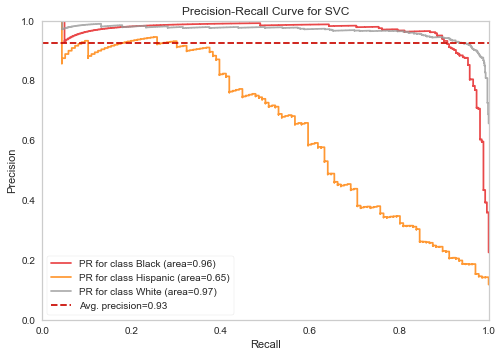

In [66]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## 3. RF

### Vanilla RF Model

In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
X2 = df.drop('DODRace', axis=1)
y = df.DODRace

In [69]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [70]:
X2[cat]

,Gender,SubjectsBirthLocation,WritingPreference
0,Female,Germany,Right hand
1,Female,California,Right hand
2,Female,Texas,Right hand
3,Female,District of Columbia,Right hand
4,Female,Texas,Right hand
...,...,...,...
6063,Male,Colorado,Right hand
6064,Male,Oklahoma,Right hand
6065,Male,Oklahoma,Right hand
6066,Male,Oklahoma,Right hand


In [71]:
encoder = OrdinalEncoder()

In [72]:
X2[cat] = encoder.fit_transform(X2[cat])

In [73]:
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0.0,41.0,26,2.0
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0.0,18.0,21,2.0
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0.0,119.0,23,2.0
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,0.0,30.0,22,2.0
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,0.0,119.0,45,2.0


In [74]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.25, random_state = 101)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=101)

In [77]:
rf_model.fit(X2_train, y2_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [78]:
eval_metric(rf_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[223   0 111]
 [ 12   4 145]
 [  8   6 934]]
              precision    recall  f1-score   support

       Black       0.92      0.67      0.77       334
    Hispanic       0.40      0.02      0.05       161
       White       0.78      0.99      0.87       948

    accuracy                           0.80      1443
   macro avg       0.70      0.56      0.56      1443
weighted avg       0.77      0.80      0.76      1443


Train_Set
[[ 964    0    0]
 [   0  518    0]
 [   0    0 2844]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       964
    Hispanic       1.00      1.00      1.00       518
       White       1.00      1.00      1.00      2844

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [79]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=101)

In [80]:
scores = cross_validate(rf_model, X2_train, y2_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.111535
test_precision_Hispanic    0.886667
test_recall_Hispanic       0.059879
dtype: float64

### RF Model GridsearchCV

In [81]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[8,10,12,14]}

In [82]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=101)

In [83]:
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [84]:
rf_grid_model.fit(X2_train, y2_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [85]:
rf_grid_model.best_params_   

{'max_depth': 8, 'n_estimators': 400}

In [86]:
rf_grid_model.best_score_

0.41116504854368935

In [87]:
eval_metric(rf_grid_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[263  13  58]
 [ 23  61  77]
 [ 36 121 791]]
              precision    recall  f1-score   support

       Black       0.82      0.79      0.80       334
    Hispanic       0.31      0.38      0.34       161
       White       0.85      0.83      0.84       948

    accuracy                           0.77      1443
   macro avg       0.66      0.67      0.66      1443
weighted avg       0.79      0.77      0.78      1443


Train_Set
[[ 920   12   32]
 [   3  467   48]
 [  42  154 2648]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95       964
    Hispanic       0.74      0.90      0.81       518
       White       0.97      0.93      0.95      2844

    accuracy                           0.93      4326
   macro avg       0.89      0.93      0.91      4326
weighted avg       0.94      0.93      0.93      4326



In [88]:
rf_grid_model = RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=15, min_samples_split=22, n_estimators=64, random_state=101)
rf_grid_model.fit(X2_train, y2_train)
rf_grid_model.feature_importances_
feats = pd.DataFrame(index=X2.columns, data=rf_grid_model.feature_importances_, columns = ["Feature Importance"])
rf_feature_imp = feats.sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
sittingheight,0.056341
eyeheightsitting,0.048472
elbowrestheight,0.044433
buttockpopliteallength,0.042802
interpupillarybreadth,0.037890
heelbreadth,0.034849
bicristalbreadth,0.031732
buttockkneelength,0.026530
radialestylionlength,0.025922
bitragionchinarc,0.023808


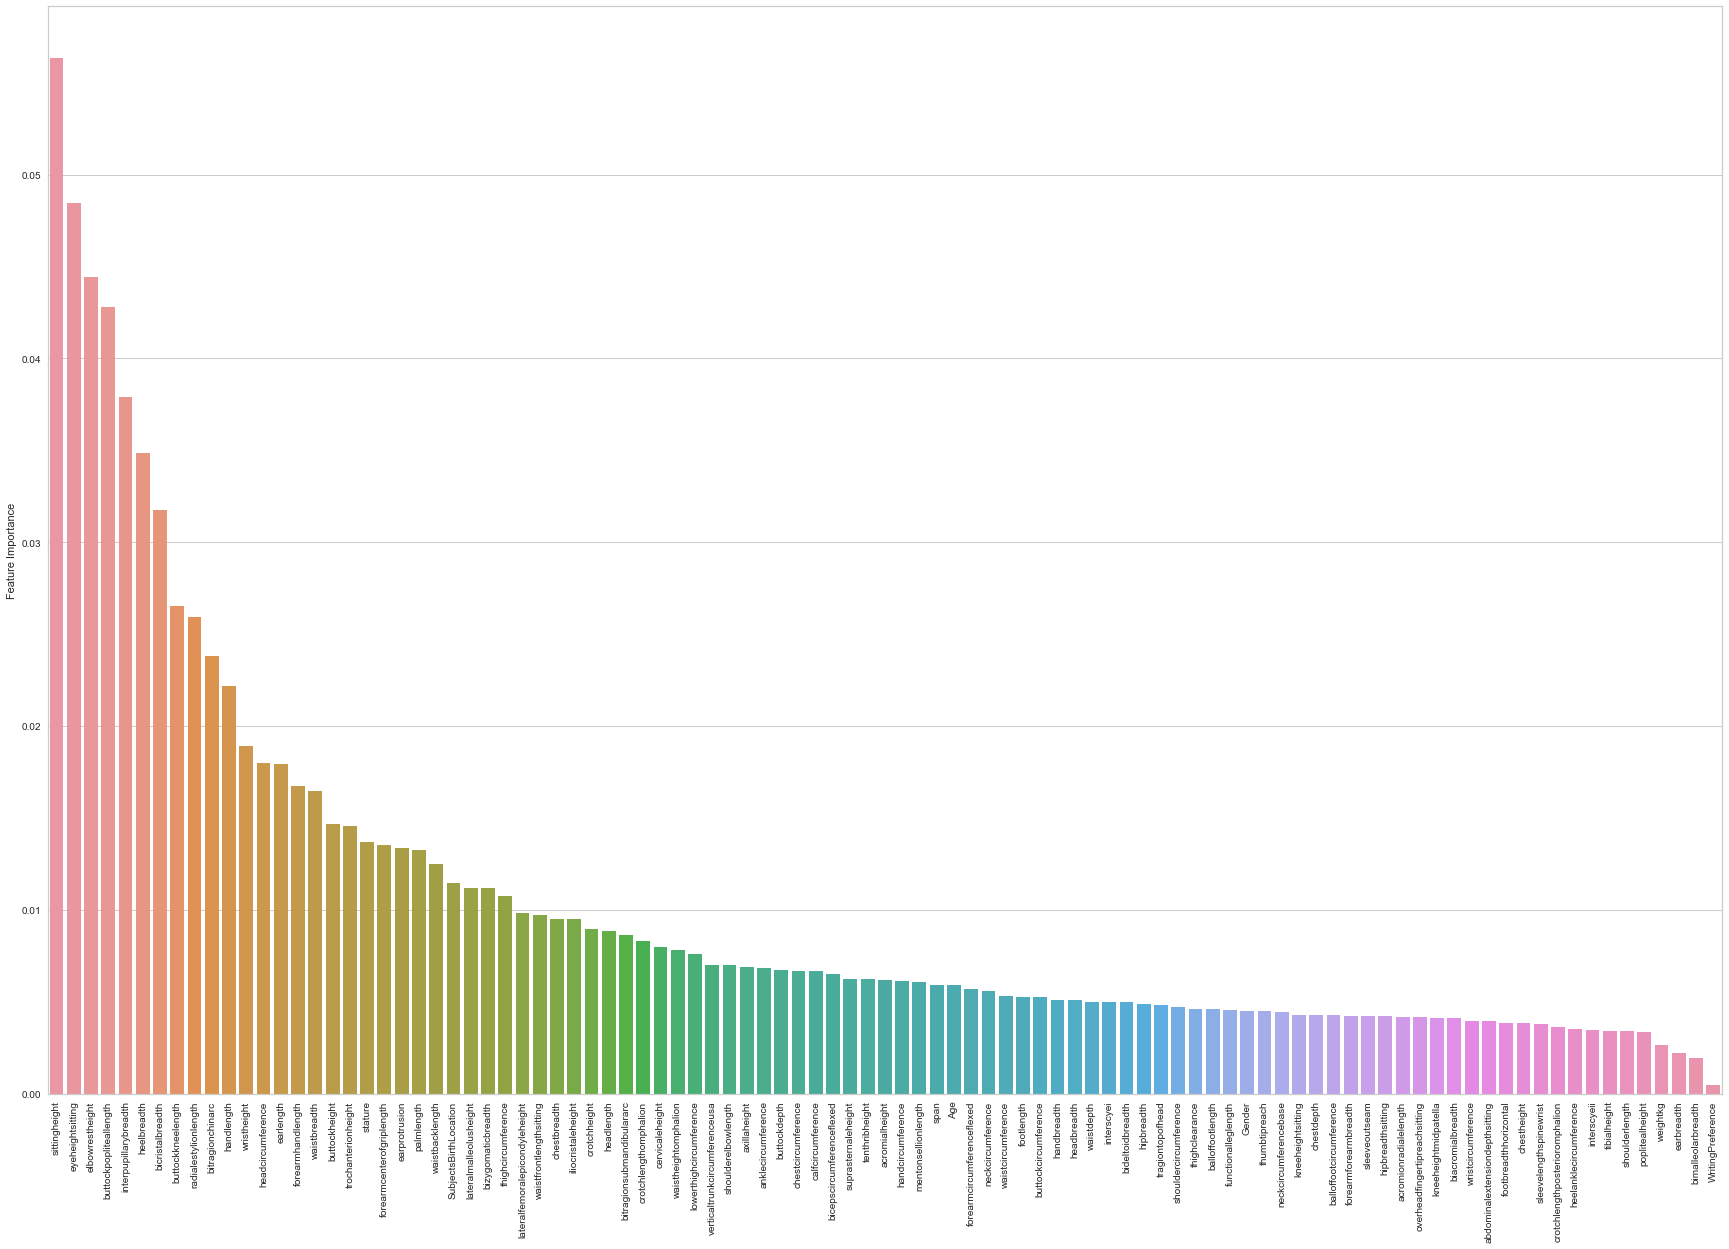

In [89]:
plt.figure(figsize=(30,20))
sns.barplot(data=rf_feature_imp, x=rf_feature_imp.index, y='Feature Importance')

plt.xticks(rotation=90);

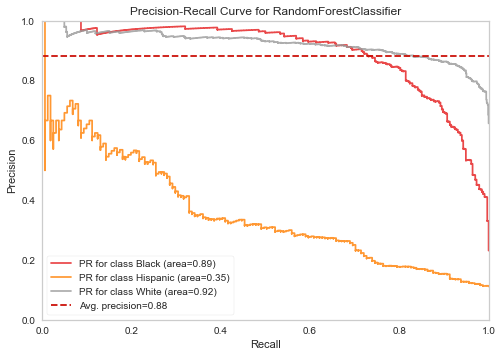

In [90]:
rf_grid_model = RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=15, min_samples_split=22, n_estimators=64, random_state=101)

viz = PrecisionRecallCurve(
    rf_grid_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X2_train, y2_train)
viz.score(X2_test, y2_test)
viz.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [91]:
from xgboost import XGBClassifier

In [92]:
xgb_model = XGBClassifier(random_state=101)

In [93]:
from sklearn.utils import class_weight

In [94]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y2_train)

In [95]:
xgb_model.fit(X2_train, y2_train, sample_weight=classes_weights)

[21:01:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [96]:
eval_metric(xgb_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[288   5  41]
 [ 15  67  79]
 [ 26  27 895]]
              precision    recall  f1-score   support

       Black       0.88      0.86      0.87       334
    Hispanic       0.68      0.42      0.52       161
       White       0.88      0.94      0.91       948

    accuracy                           0.87      1443
   macro avg       0.81      0.74      0.77      1443
weighted avg       0.86      0.87      0.86      1443


Train_Set
[[ 964    0    0]
 [   0  518    0]
 [   0    0 2844]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       964
    Hispanic       1.00      1.00      1.00       518
       White       1.00      1.00      1.00      2844

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326



In [97]:
xgb_model = XGBClassifier(random_state=101)

In [98]:
scores = cross_validate(xgb_model, X2_train, y2_train, scoring = scoring, cv = 10, fit_params={'sample_weight':classes_weights})
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

[21:02:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

test_f1_Hispanic           0.523832
test_precision_Hispanic    0.687143
test_recall_Hispanic       0.426772
dtype: float64

### XGBoost Model GridsearchCV

In [99]:
xgb_model = XGBClassifier(random_state=101)

In [100]:
param_grid = {"n_estimators":[200, 400],
              'max_depth':[4,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [101]:
xgb_grid_model = GridSearchCV(xgb_model,
                             param_grid,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             verbose=2)

In [102]:
xgb_grid_model.fit(X2_train, y2_train, sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future ve

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/mustafa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1)

[21:57:16] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...
                                     random_state=101, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [4, 5, 6],
                         'n_estimators': [200, 400], 'subsample': [0.5, 1]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [103]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 1}

In [104]:
xgb_grid_model.best_score_

0.5308439133681851

In [105]:
eval_metric(xgb_grid_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[288   9  37]
 [ 14  88  59]
 [ 30  60 858]]
              precision    recall  f1-score   support

       Black       0.87      0.86      0.86       334
    Hispanic       0.56      0.55      0.55       161
       White       0.90      0.91      0.90       948

    accuracy                           0.86      1443
   macro avg       0.78      0.77      0.77      1443
weighted avg       0.85      0.86      0.85      1443


Train_Set
[[ 963    0    1]
 [   0  518    0]
 [  10   46 2788]]
              precision    recall  f1-score   support

       Black       0.99      1.00      0.99       964
    Hispanic       0.92      1.00      0.96       518
       White       1.00      0.98      0.99      2844

    accuracy                           0.99      4326
   macro avg       0.97      0.99      0.98      4326
weighted avg       0.99      0.99      0.99      4326



[21:57:39] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:39] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

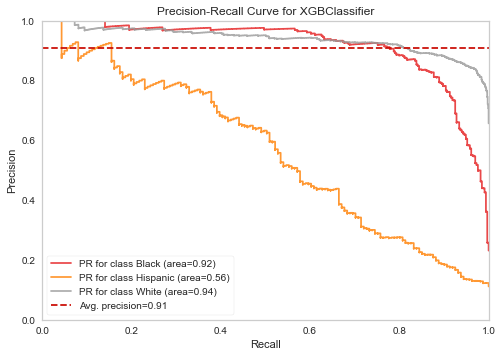

In [106]:
xgb_grid_model = XGBClassifier(colsample_bytree = 1,
                               learning_rate = 0.1,
                               max_depth = 3,
                               n_estimators = 100,
                               subsample = 0.8, 
                               random_state=101)

viz = PrecisionRecallCurve(
    xgb_grid_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X2_train, y2_train)
viz.score(X2_test, y2_test)
viz.show();

In [107]:
xgb_grid_model = XGBClassifier(max_depth=10, max_features=15, min_samples_split=22, n_estimators=64, random_state=101)
xgb_grid_model.fit(X2_train, y2_train, sample_weight=classes_weights)
xgb_grid_model.feature_importances_
feats = pd.DataFrame(index=X2.columns, data=xgb_grid_model.feature_importances_, columns = ["Feature Importance"])
xgb_feature_imp = feats.sort_values("Feature Importance", ascending = False)
xgb_feature_imp

[21:57:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:57:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Feature Importance
elbowrestheight,0.052761
buttockpopliteallength,0.043290
sittingheight,0.033653
SubjectsBirthLocation,0.023452
interpupillarybreadth,0.022405
heelbreadth,0.020729
eyeheightsitting,0.020717
buttockkneelength,0.018485
Gender,0.017259
earlength,0.016672


# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [108]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [109]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [110]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [111]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [112]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [113]:
y_resampled_over.value_counts()

White       3034
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [114]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## SVC Over/Under Sampling

In [115]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ('svc', SVC(class_weight = 'balanced', C = 27.825594022071257, gamma = 'auto',  random_state=101))]

In [116]:
smote_pipeline_svc = imbpipeline(steps=operations)

In [117]:
smote_pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=27.825594022071257, class_weight='balanced',
                     gamma='auto', random_state=101))])

In [118]:
eval_metric(smote_pipeline_svc, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  8  94  34]
 [ 20  66 672]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.55      0.69      0.61       136
       White       0.94      0.89      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.83      0.81      1154
weighted avg       0.88      0.87      0.88      1154


Train_Set
[[ 971   29   38]
 [  30  409  104]
 [  66  271 2697]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1038
    Hispanic       0.58      0.75      0.65       543
       White       0.95      0.89      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.86      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [119]:
model = smote_pipeline_svc = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.605353
test_precision_Hispanic    0.535925
test_recall_Hispanic       0.697946
dtype: float64

## Xgboost Over/ Under Sampling

In [120]:
smote_pipeline_xgb = XGBClassifier(colsample_bytree = 1, 
                                        learning_rate = 0.1,
                                        max_depth = 3,
                                        n_estimators = 100,
                                        subsample = 0.8, 
                                        random_state=101,
                                        )

In [121]:
smote_pipeline_xgb.fit(X2_train, y2_train, sample_weight=classes_weights)        

[21:58:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [122]:
eval_metric(smote_pipeline_xgb, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[287  18  29]
 [ 15 107  39]
 [ 46 123 779]]
              precision    recall  f1-score   support

       Black       0.82      0.86      0.84       334
    Hispanic       0.43      0.66      0.52       161
       White       0.92      0.82      0.87       948

    accuracy                           0.81      1443
   macro avg       0.73      0.78      0.74      1443
weighted avg       0.84      0.81      0.82      1443


Train_Set
[[ 918   21   25]
 [  13  446   59]
 [  74  268 2502]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       964
    Hispanic       0.61      0.86      0.71       518
       White       0.97      0.88      0.92      2844

    accuracy                           0.89      4326
   macro avg       0.83      0.90      0.86      4326
weighted avg       0.91      0.89      0.90      4326



- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [123]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [125]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[244  10   6]
 [  8 100  28]
 [ 26  90 642]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.50      0.74      0.60       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 974   33   31]
 [  18  460   65]
 [  69  347 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [126]:
import shap
explainer = shap.Explainer(model_shap, X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [127]:
shap_values

[array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -6.64735877e+00,  0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -7.10949566e-01,
         -4.76846707e+01, -0.00000000e+00, -4.45109324e-01,
         -2.42996494e+01, -1.23872482e+01,  2.75728040e-01,
          0.00000000e+00, -8.93154890e+00,  0.00000000e+00,
         -9.58467615e+01, -0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00, -3.08837305e+01, -1.00974229e+01,
         -5.84760406e+01, -0.00000000e+00, -7.95195626e+00,
          0.00000000e+00,  4.14623732e+00,  7.39561358e-01,
          4.40185728e+00,  6.51412854e+00,  0.00000000e+00,
         -1.07166910e+01, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -2.73430043e+01,  0.00000000e+00,
         -1.41490082e+01, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -2.43167667e+01,  4.17766055e+00,
         -7.17894925e-01, -0.00000000e+00, -2.66668954e+01,
         -3.41022081e+01, -4.88071828e+0

In [128]:
print(shap_values[0].shape)

(1, 232)


In [129]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[0],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: Black


In [130]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

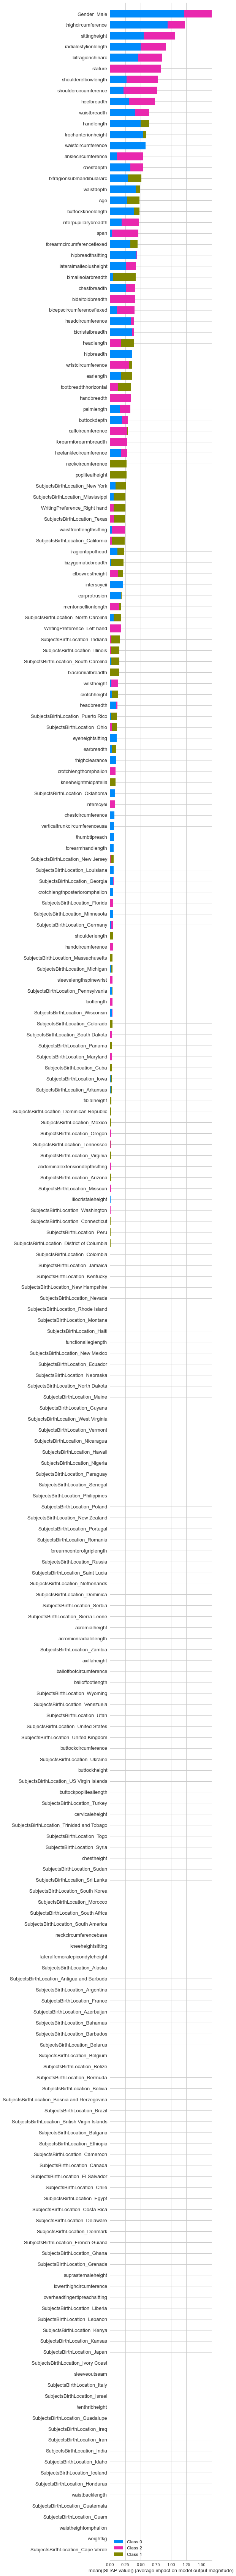

In [131]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

In [132]:
hispanic = ['forearmcircumferenceflexed', 'footbreadthhorizontal', 'headlength', 'Age', 'bitragionsubmandibulararc', 'buttockkneelength', 'hipbreadth', 'earlength', 'WritingPreference', 'SubjectsBirthLocation', 'bimalleolarbreadth', 'handbreadth', 'earprotrusion', 'tragiontopofhead', 'elbowrestheight', 'waistdepth', 'bizygomaticbreadth', 'tenthribheight', 'neckcircumference', 'eyeheightsitting', 'tibialheight', 'poplitealheight', 'abdominalextensiondepthsitting', 'shoulderlength', 'biacromialbreadth']

In [133]:
X3 = df[hispanic]    
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [134]:
X3.shape 

(5769, 160)

In [135]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

In [136]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [137]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [138]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[219  13  28]
 [ 11 101  24]
 [ 78 136 544]]
              precision    recall  f1-score   support

       Black       0.71      0.84      0.77       260
    Hispanic       0.40      0.74      0.52       136
       White       0.91      0.72      0.80       758

    accuracy                           0.75      1154
   macro avg       0.68      0.77      0.70      1154
weighted avg       0.81      0.75      0.76      1154


Train_Set
[[ 874   59  105]
 [  35  427   81]
 [ 329  464 2241]]
              precision    recall  f1-score   support

       Black       0.71      0.84      0.77      1038
    Hispanic       0.45      0.79      0.57       543
       White       0.92      0.74      0.82      3034

    accuracy                           0.77      4615
   macro avg       0.69      0.79      0.72      4615
weighted avg       0.82      0.77      0.78      4615



In [139]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.545442
test_precision_Hispanic    0.430971
test_recall_Hispanic       0.744108
dtype: float64

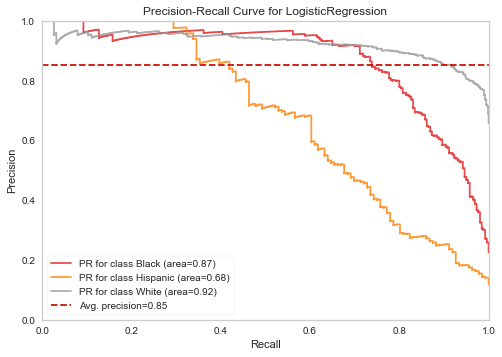

In [140]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

In [141]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [142]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [143]:
smote_pipeline_2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [144]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[207  18  35]
 [  8  97  31]
 [ 75  90 593]]
              precision    recall  f1-score   support

       Black       0.71      0.80      0.75       260
    Hispanic       0.47      0.71      0.57       136
       White       0.90      0.78      0.84       758

    accuracy                           0.78      1154
   macro avg       0.70      0.76      0.72      1154
weighted avg       0.81      0.78      0.79      1154


Train_Set
[[ 873   55  110]
 [  43  380  120]
 [ 354  332 2348]]
              precision    recall  f1-score   support

       Black       0.69      0.84      0.76      1038
    Hispanic       0.50      0.70      0.58       543
       White       0.91      0.77      0.84      3034

    accuracy                           0.78      4615
   macro avg       0.70      0.77      0.72      4615
weighted avg       0.81      0.78      0.79      4615



In [145]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.548934
test_precision_Hispanic    0.459990
test_recall_Hispanic       0.681515
dtype: float64

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [146]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(C=2,class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [147]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=2, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [148]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Gender_Male,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,S

[CV 4/5] END log__C=0.1, log__penalty=l1, log__solver=liblinear;, score=0.472 total time=   0.4s
[CV 4/5] END log__C=0.1, log__penalty=l2, log__solver=lbfgs;, score=0.694 total time=   0.4s
[CV 2/5] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END log__C=0.5, log__penalty=l2, log__solver=liblinear;, score=0.651 total time=   0.2s
[CV 4/5] END log__C=0.5, log__penalty=l2, log__solver=liblinear;, score=0.565 total time=   0.1s
[CV 3/5] END log__C=0.5, log__penalty=l2, log__solver=lbfgs;, score=0.817 total time=   0.6s
[CV 1/5] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=0.661 total time=   2.0s
[CV 3/5] END .......svc__C=0.1, svc__gamma=auto;, score=0.569 total time=   4.5s
[CV 5/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.519 total time=   4.4s
[CV 4/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.398 total time=   4.2s
[CV

[CV 3/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END log__C=0.1, log__penalty=l2, log__solver=liblinear;, score=0.509 total time=   0.1s
[CV 2/5] END log__C=0.1, log__penalty=l2, log__solver=lbfgs;, score=0.734 total time=   0.4s
[CV 1/5] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END log__C=0.5, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END log__C=0.5, log__penalty=l2, log__solver=liblinear;, score=0.679 total time=   0.2s
[CV 5/5] END log__C=0.5, log__penalty=l2, log__solver=liblinear;, score=0.731 total time=   0.1s
[CV 2/5] END log__C=0.5, log__penalty=l2, log__solver=lbfgs;, score=0.761 total time=   0.4s
[CV 5/5] END log__C=0.5, log__penalty=l2, log__solver=lbfgs;, score=0.870 total time=   0.5s
[CV 1/5] END log__C=1, log__penalty=l1, log__solver=lbfgs;, score=

In [149]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.254290
acromialheight                                  1408.630265
acromionradialelength                            328.071590
anklecircumference                               225.201768
axillaheight                                    1301.902583
balloffootcircumference                          244.408043
balloffootlength                                 195.118911
biacromialbreadth                                399.706015
bicepscircumferenceflexed                        341.663027
bicristalbreadth                                 274.903449
bideltoidbreadth                                 491.454845
bimalleolarbreadth                                72.335413
bitragionchinarc                                 324.962212
bitragionsubmandibulararc                        306.677760
bizygomaticbreadth                               139.529381
buttockcircumference                            1022.059456
buttockdepth                            

In [158]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [156]:
final_model.predict(X.loc[[201]])

array(['White'], dtype=object)

In [157]:
y[201]

'White'

In [153]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7948134302976619

In [154]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7877216110682204

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___